# <center> Project-3. EDA+Feature Engineering
---
## <center> Вводные данные и подготовка к работе
---

Первоначальная версия датасета содержит 17 полей со следующей информацией:

- hotel_address — адрес отеля;

- review_date — дата, когда рецензент разместил соответствующий отзыв;

- average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;

- hotel_name — название отеля;

- reviewer_nationality — страна рецензента;

- negative_review — отрицательный отзыв, который рецензент дал отелю;

- review_total_negative_word_counts — общее количество слов в отрицательном отзыв;

- positive_review — положительный отзыв, который рецензент дал отелю;

- review_total_positive_word_counts — общее количество слов в положительном отзыве.

- reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;

- total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;

- total_number_of_reviews — общее количество действительных отзывов об отеле;

- tags — теги, которые рецензент дал отелю;

- days_since_review — количество дней между датой проверки и датой очистки;

- additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

- lat — географическая широта отеля;

- lng — географическая долгота отеля.

In [80]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import category_encoders as ce
import plotly.express as px
import numpy as np

from sklearn import preprocessing
from sklearn.feature_selection import chi2 # хи-квадрат
from sklearn.feature_selection import f_classif # anova

In [81]:
hotels = pd.read_csv('data/hotels.csv')
display(hotels.head())
display(hotels.info())

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

None

---
## <center> Очистка данных
---

Для начала удалим дубликаты, если они есть.

In [82]:
mask_dupl = hotels.duplicated(subset=list(hotels.columns))
hotels_duplicates = hotels[mask_dupl]
print(f'Найдено дубликатов: {hotels_duplicates.shape[0]}')

hotels = hotels.drop_duplicates(subset=list(hotels.columns))
print(f'Результирующее число записей: {hotels.shape[0]}')

Найдено дубликатов: 307
Результирующее число записей: 386496


Оценим корреляцию изначальных числовых признаков.

In [83]:
hotels.isna().value_counts()

hotel_address  additional_number_of_scoring  review_date  average_score  hotel_name  reviewer_nationality  negative_review  review_total_negative_word_counts  total_number_of_reviews  positive_review  review_total_positive_word_counts  total_number_of_reviews_reviewer_has_given  reviewer_score  tags   days_since_review  lat    lng  
False          False                         False        False          False       False                 False            False                              False                    False            False                              False                                       False           False  False              False  False    384048
                                                                                                                                                                                                                                                                                                                                

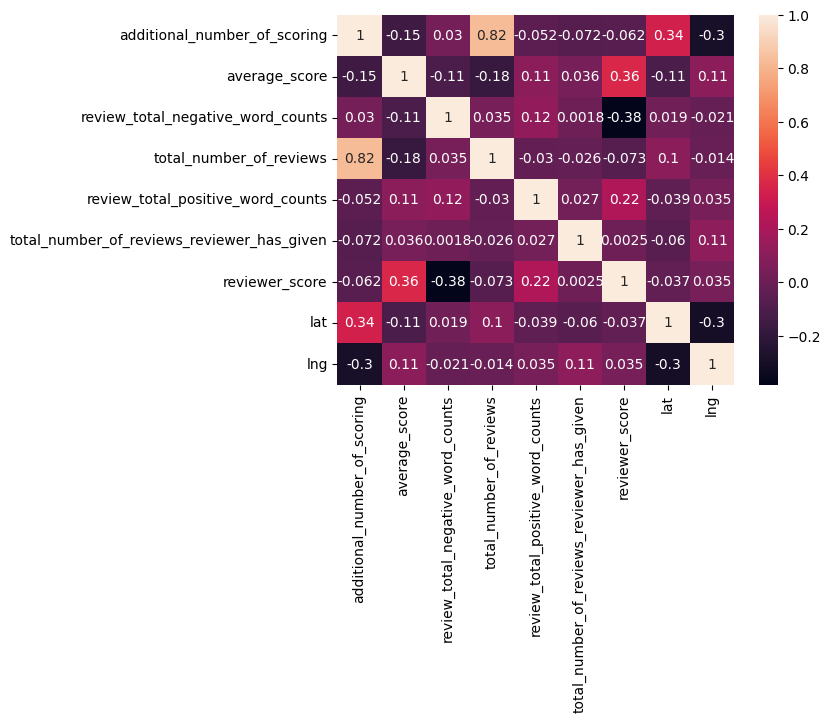

In [84]:
sns.heatmap(hotels.corr(numeric_only=True), annot=True);

Видим высокие значения корреляции у признаков total_number_of_reviews и addditional_number_of_scoring. Пока с ними ничего не делаем, просто имеем это в виду. Вернёмся к ним после отбора признаков.

In [85]:
#Задание 4.2 - количество наименований отелей
hotels['hotel_name'].value_counts()

hotel_name
Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
                                                     ... 
Ibis Styles Milano Palmanova                            7
Renaissance Paris Republique Hotel Spa                  7
Hotel Wagner                                            6
Hotel Gallitzinberg                                     6
Mercure Paris Porte d Orleans                           5
Name: count, Length: 1492, dtype: int64

In [86]:
#Приведём даты к формату datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=True)

#Задание 4.3
print('Дата самого первого отзыва:\n',
      hotels['review_date'].sort_values().head(1))
print('Дата самого свежего отзыва:\n',
      hotels['review_date'].sort_values(ascending=False).head(1))

Дата самого первого отзыва:
 318705   2015-08-04
Name: review_date, dtype: datetime64[ns]
Дата самого свежего отзыва:
 318267   2017-08-03
Name: review_date, dtype: datetime64[ns]


C:\Users\telis\AppData\Local\Temp\ipykernel_163692\3725267793.py:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=True)


In [87]:
#Приведём столбец days_since_review к удобоваримому 
#для модели виду, убрав 'day' в конце

def day_transf(table_string):
    
    """ Функция-преобразователь для преобразования
    столбца 'days_since_review'.

    Args:
        table_string (_string_): принимает на вход 
        строку из столбца

    Returns:
        _string_: возвращает преобразованную строку
    """    
    
    word_list = table_string.split(' ')
    
    return int(word_list[0])

hotels['days_since_review'] = hotels['days_since_review'].apply(day_transf)

#Проверим результат
hotels['days_since_review'].head(3)

0    531
1    203
2    289
Name: days_since_review, dtype: int64

In [88]:
def cities_convert(string):
    
    """Функция для конвертации страны из адреса.
    
    Есть 2 способа работы функции:
    1) Поиск в адресе столицы и конвертации её
    в страну.
    2) Если страна находится в конце адреса,
    можно взять последнее слово.
    
    В данном датасете быстрее работает второй способ.

    Args:
        string (_str_): строчка датасета 

    Returns:
        _str_: строчка со страной
    """    
    #Столицы Европейских городов
    europe_capital_cities = ['Amsterdam', 'Andora La Vella', 'Athens', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Chisinau', 'Dublin', 'Helsinki', 'Kiev', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Madrid', 'Minsk', 'Monako', 'Moskow', 'Nicosia', 'Copenhagen', 'Nuuk', 'Oslo', 'Paris', 'Podgorica', 'Prague', 'Reykjavik', 'Riga', 'Rome', 'San Marino', 'Sarajevo', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Tirana', 'Vaduz', 'Valletta', 'Vatican City', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']
    #Словарь столица-страна
    europe_cities_to_countries_dict = {'Amsterdam':'Netherlands', 'Andora La Vella':'Andorra', 'Athens':'Greece', 'Belgrade':'Serbia', 'Berlin':'Germany', 'Bern':'Switzerland', 'Bratislava':'Slovakia', 'Brussels':'Belgium', 'Bucharest':'Romania', 'Budapest':'Hungary', 'Chisinau':'Moldova', 'Copenhagen':'Denmark', 'Dublin':'Ireland', 'Helsinki':'Finland', 'Kiev':'Ukraine', 'Lisbon':'Portugal', 'Ljubljana':'Slovenia', 'London':'United Kingdom', 'Luxembourg':'Luxembourg', 'Madrid':'Spain', 'Minsk':'Belarus', 'Monako':'Monaco', 'Moskow':'Russia', 'Nicosia':'Cyprus', 'Nuuk':'Greenland', 'Oslo':'Norway', 'Paris':'France', 'Podgorica':'Montenegro', 'Prague':'Czech Republic', 'Reykjavik':'Iceland', 'Riga':'Latvia', 'Rome':'Italy', 'San Marino':'San Marino', 'Sarajevo':'Bosnia & Herzegovina', 'Skopje':'North Macedonia', 'Sofia':'Bulgaria', 'Stockholm':'Sweden', 'Tallinn':'Estonia', 'Tirana':'Albania', 'Vaduz':'Liechtenstein', 'Valletta':'Malta', 'Vatican City':'Holy See', 'Vienna':'Austria', 'Vilnius':'Lithuania', 'Warsaw':'Poland', 'Zagreb':'Croatia'}
    europe_capitals_list = europe_cities_to_countries_dict.values()
    
    word_list = string.split(' ')
    capital = word_list[-1]
    if capital == 'Kingdom':
        return word_list[-2] + ' ' + word_list[-1]
    else:
        return capital
    # for word in word_list:
    #     if word in europe_capital_cities:
    #         return europe_cities_to_countries_dict[word]
    #     elif word == 'Vatican':
    #         return 'Holy Sea'
    #     elif word == 'Andora':
    #         return 'Andorra'
    #     elif word == 'San Marino':
    #         return word
    #     else:
    #         return 'other'
        

hotels['hotel_country'] = hotels['hotel_address'].apply(cities_convert)
hotels.drop(['hotel_address'], axis=1, inplace=True)

Город вычленять отдельно не стал, смысла нет, если вычленилась страна.

In [89]:
hotels['review_day'] = hotels['review_date'].dt.day_of_week

In [90]:
def season_convert(date):
    
    if date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    elif date.month in [9,10,11]:
        return 'Autumn'
    elif date.month in [12,1,2]:
        return 'Winter'
    
hotels['season'] = hotels['review_date'].apply(season_convert)

In [91]:
#Вытянем уникальные теги из соответствующего столбца
tags_list = []

tags_dataset = hotels.copy()

def sep_tags_func(tags_string):
    #Мини-функция для удаления пробелов
    tags = tags_string[2:-2]
    tags_splitted = tags.strip().split(' \', \' ')
    return tags_splitted

tags_dataset['tags'] = tags_dataset['tags'].apply(sep_tags_func)
tags_dataset = tags_dataset.explode('tags')


In [92]:
#Задание 4.4
print('Количество уникальных тегов:',
      len(tags_dataset['tags'].unique()))  #2368
print('-'*100)
#Задание 4.5
print('Самый частый тег:',
      tags_dataset['tags'].value_counts().head(1))  #Leisure trip
#Задание 4.6
tags_dataset['tags'].value_counts()  #1

Количество уникальных тегов: 2368
----------------------------------------------------------------------------------------------------
Самый частый тег: tags
Leisure trip    313353
Name: count, dtype: int64


tags
Leisure trip                         313353
Submitted from a mobile device       230608
Couple                               189046
Stayed 1 night                       145296
Stayed 2 nights                      100176
                                      ...  
Studio with Spa Access                    1
Comfort Family Room                       1
Junior Suite Free Wifi                    1
Design Suite                              1
Executive Double Room Non Smoking         1
Name: count, Length: 2368, dtype: int64

In [93]:
#Посчитаем кол-во тегов на каждом отзыве

hotels['tags_count'] = hotels['tags'].apply(lambda x: len(sep_tags_func(x)))

In [94]:
#Делаем из посчитанных данных обычный список из тегов
tags = tags_dataset['tags'].value_counts().reset_index()
tags.columns = ['Tag', 'Counter']
tags_list = tags['Tag'].to_list()
display(tags_list)

#Делаем список тегов времени проживания в отеле
stay_list = []
for item in tags_list:
    if 'Stayed' in item.split():
        if item not in stay_list:
            stay_list.append(item)
        else:
            continue
        
        
def tags_convert_func(string):
    global stay_list
    sep_string = string[2:-2]
    sep_string = sep_string.strip().split(' \', \' ')
    for tag in sep_string:
        if tag in stay_list:
            if tag.split(' ')[1] != np.NaN:
                return int(tag.split(' ')[1])
            else:
                return 0

hotels['stay_status'] = hotels['tags'].apply(tags_convert_func)

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children',
 'Stayed 4 nights',
 'Double Room',
 'Standard Double Room',
 'Superior Double Room',
 'Family with older children',
 'Deluxe Double Room',
 'Double or Twin Room',
 'Stayed 5 nights',
 'Standard Double or Twin Room',
 'Classic Double Room',
 'Superior Double or Twin Room',
 '2 rooms',
 'Stayed 6 nights',
 'Standard Twin Room',
 'Single Room',
 'Twin Room',
 'Stayed 7 nights',
 'Executive Double Room',
 'Classic Double or Twin Room',
 'Superior Twin Room',
 'Club Double Room',
 'Deluxe Double or Twin Room',
 'Queen Room',
 'Deluxe King Room',
 'Superior Queen Room',
 'Standard Single Room',
 'Junior Suite',
 'Triple Room',
 'Classic Room',
 'Superior Room',
 'Superior King Room',
 'Standard Room',
 'Deluxe Room',
 'Double Guest Room',
 'Standard Queen Room',
 'Deluxe Single Room',
 'Small Do

In [95]:
#Делаем признаки-мигалки из некоторых тегов
hotels['Leisure_trip'] = hotels['tags'].apply(lambda x: 1 if 'Leisure trip' in x else 0)
hotels['Business_trip'] = hotels['tags'].apply(lambda x: 1 if 'Business trip' in x else 0)
hotels['Submitted_from_mobile'] = hotels['tags'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)
hotels['Solo_traveler'] = hotels['tags'].apply(lambda x: 1 if 'Solo traveler' in x else 0)
hotels['Couple'] = hotels['tags'].apply(lambda x: 1 if 'Couple' in x else 0)
hotels['Family_with_young_children'] = hotels['tags'].apply(lambda x: 1 if 'Family with young children' in x else 0)
hotels['Family_with_older_children'] = hotels['tags'].apply(lambda x: 1 if 'Family with older children' in x else 0)
hotels['Group'] = hotels['tags'].apply(lambda x: 1 if 'Group' in x else 0)

In [96]:
#Закодируем признаки однократным кодированием,
#удалим закодированные столбцы

#страна дислокации отеля
oneHotEncoder = ce.OneHotEncoder(cols=['hotel_country'], use_cat_names=True)
type_bin = oneHotEncoder.fit_transform(hotels[['hotel_country']])
hotels = pd.concat([hotels, type_bin], axis=1)

#Сезон
oneHotEncoder = ce.OneHotEncoder(cols=['season'], use_cat_names=True)
type_bin = oneHotEncoder.fit_transform(hotels[['season']])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.drop(['season', 'hotel_country'], axis=1, inplace=True)

In [97]:
#Закодируем бинарным кодированием, удалим 
#закодированные столбцы

#Гражданство страны
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

#Имена отелей
bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis=1)

#Количество ночей
bin_encoder = ce.BinaryEncoder(cols=['stay_status'])
type_bin = bin_encoder.fit_transform(hotels['stay_status'])
hotels = pd.concat([hotels, type_bin], axis=1)

hotels.drop(['reviewer_nationality', 'hotel_name', 'stay_status'], axis=1, inplace=True)

c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\telis\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: Futur

In [98]:
hotels

,additional_number_of_scoring,review_date,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,...,hotel_name_6,hotel_name_7,hotel_name_8,hotel_name_9,hotel_name_10,stay_status_0,stay_status_1,stay_status_2,stay_status_3,stay_status_4
0,581,2016-02-19,8.4,Leaving,3,1994,Staff were amazing,4,7,10.0,...,0,0,0,0,1,0,0,0,0,1
1,299,2017-01-12,8.3,poor breakfast,3,1361,location,2,14,6.3,...,0,0,0,1,0,0,0,0,1,0
2,32,2016-10-18,8.9,No kettle in room,6,406,No Positive,0,14,7.5,...,0,0,0,1,1,0,0,0,1,1
3,34,2015-09-22,7.5,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,...,0,0,1,0,0,0,0,0,1,0
4,914,2016-03-05,8.5,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,2017-04-19,9.0,No Negative,0,617,Tr s proche du metro Earl s court,10,10,8.8,...,0,1,0,1,1,0,0,0,0,1
386799,272,2017-02-13,8.4,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,93,1,9.2,...,1,0,0,1,1,0,0,1,0,1
386800,457,2016-02-07,6.8,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,9,21,8.3,...,0,0,1,0,0,0,0,0,1,0
386801,365,2017-05-21,8.1,No Negative,0,1567,Location and very comfy bed,6,28,9.2,...,1,0,0,0,0,0,0,0,0,1


In [99]:
hotels.columns

Index(['additional_number_of_scoring', 'review_date', 'average_score',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng', 'review_day', 'tags_count',
       'Leisure_trip', 'Business_trip', 'Submitted_from_mobile',
       'Solo_traveler', 'Couple', 'Family_with_young_children',
       'Family_with_older_children', 'Group', 'hotel_country_United Kingdom',
       'hotel_country_France', 'hotel_country_Netherlands',
       'hotel_country_Italy', 'hotel_country_Austria', 'hotel_country_Spain',
       'season_Winter', 'season_Autumn', 'season_Spring', 'season_Summer',
       'reviewer_nationality_0', 'reviewer_nationality_1',
       'reviewer_nationality_2', 'reviewer_nationality_3',
       'reviewer_nationality_4', 'reviewer_nationality_5',
       'reviewer_nation

In [100]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 
            'review_total_negative_word_counts', 
            'review_total_positive_word_counts', 
            'total_number_of_reviews_reviewer_has_given', 
            'days_since_review',
            'tags_count'
]

# категориальные признаки
cat_cols = [
    'average_score', 
    'hotel_country_United Kingdom', 
    'hotel_country_France', 
    'hotel_country_Netherlands', 
    'hotel_country_Italy', 
    'hotel_country_Austria', 
    'hotel_country_Spain', 
    'stay_status_0', 
    'stay_status_1', 
    'stay_status_2', 
    'stay_status_3', 
    'stay_status_4',
    'Leisure_trip',
    'Business_trip',
    'Submitted_from_mobile',
    'Solo_traveler', 
    'Couple', 
    'Family_with_young_children', 
    'Family_with_older_children', 
    'Group',
    'hotel_name_0', 
    'hotel_name_1', 
    'hotel_name_2', 
    'hotel_name_3', 
    'hotel_name_4', 
    'hotel_name_5', 
    'hotel_name_6', 
    'hotel_name_7', 
    'hotel_name_8', 
    'hotel_name_9', 
    'hotel_name_10', 
    'season_Winter', 
    'season_Autumn', 
    'season_Spring', 
    'season_Summer',
    'reviewer_nationality_0', 
    'reviewer_nationality_1', 
    'reviewer_nationality_2', 
    'reviewer_nationality_3', 
    'reviewer_nationality_4', 
    'reviewer_nationality_5', 
    'reviewer_nationality_6', 
    'reviewer_nationality_7', 
    'review_day'
]

In [101]:
# # # !!! Столбцы для первоначального получения MAPE. 
# # # Здесь необходимый минимум приготовлений для 
# # # получения модели !!!

#P.S. Оставлю эту часть здесь, на всякий 
#случай, она экономит время на дроп оставшихся
#строковых значений

object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)
hotels = hotels.fillna(0)

#местонахождение отеля нам не так важно, 
#раз мы знаем, в какой стране он находится,
#а дату мы уже использовали 
hotels.drop(['lat', 'lng', 'review_date', 'additional_number_of_scoring'], axis=1, inplace=True)

In [102]:
def show_corr_heatmap(columns_list, title, method):
    fig_, ax_ = plt.subplots(figsize=(15, 15))
    corr = hotels[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr,
                annot=True,
                linewidths=0.1,
                ax=ax_,
                mask=mask,
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

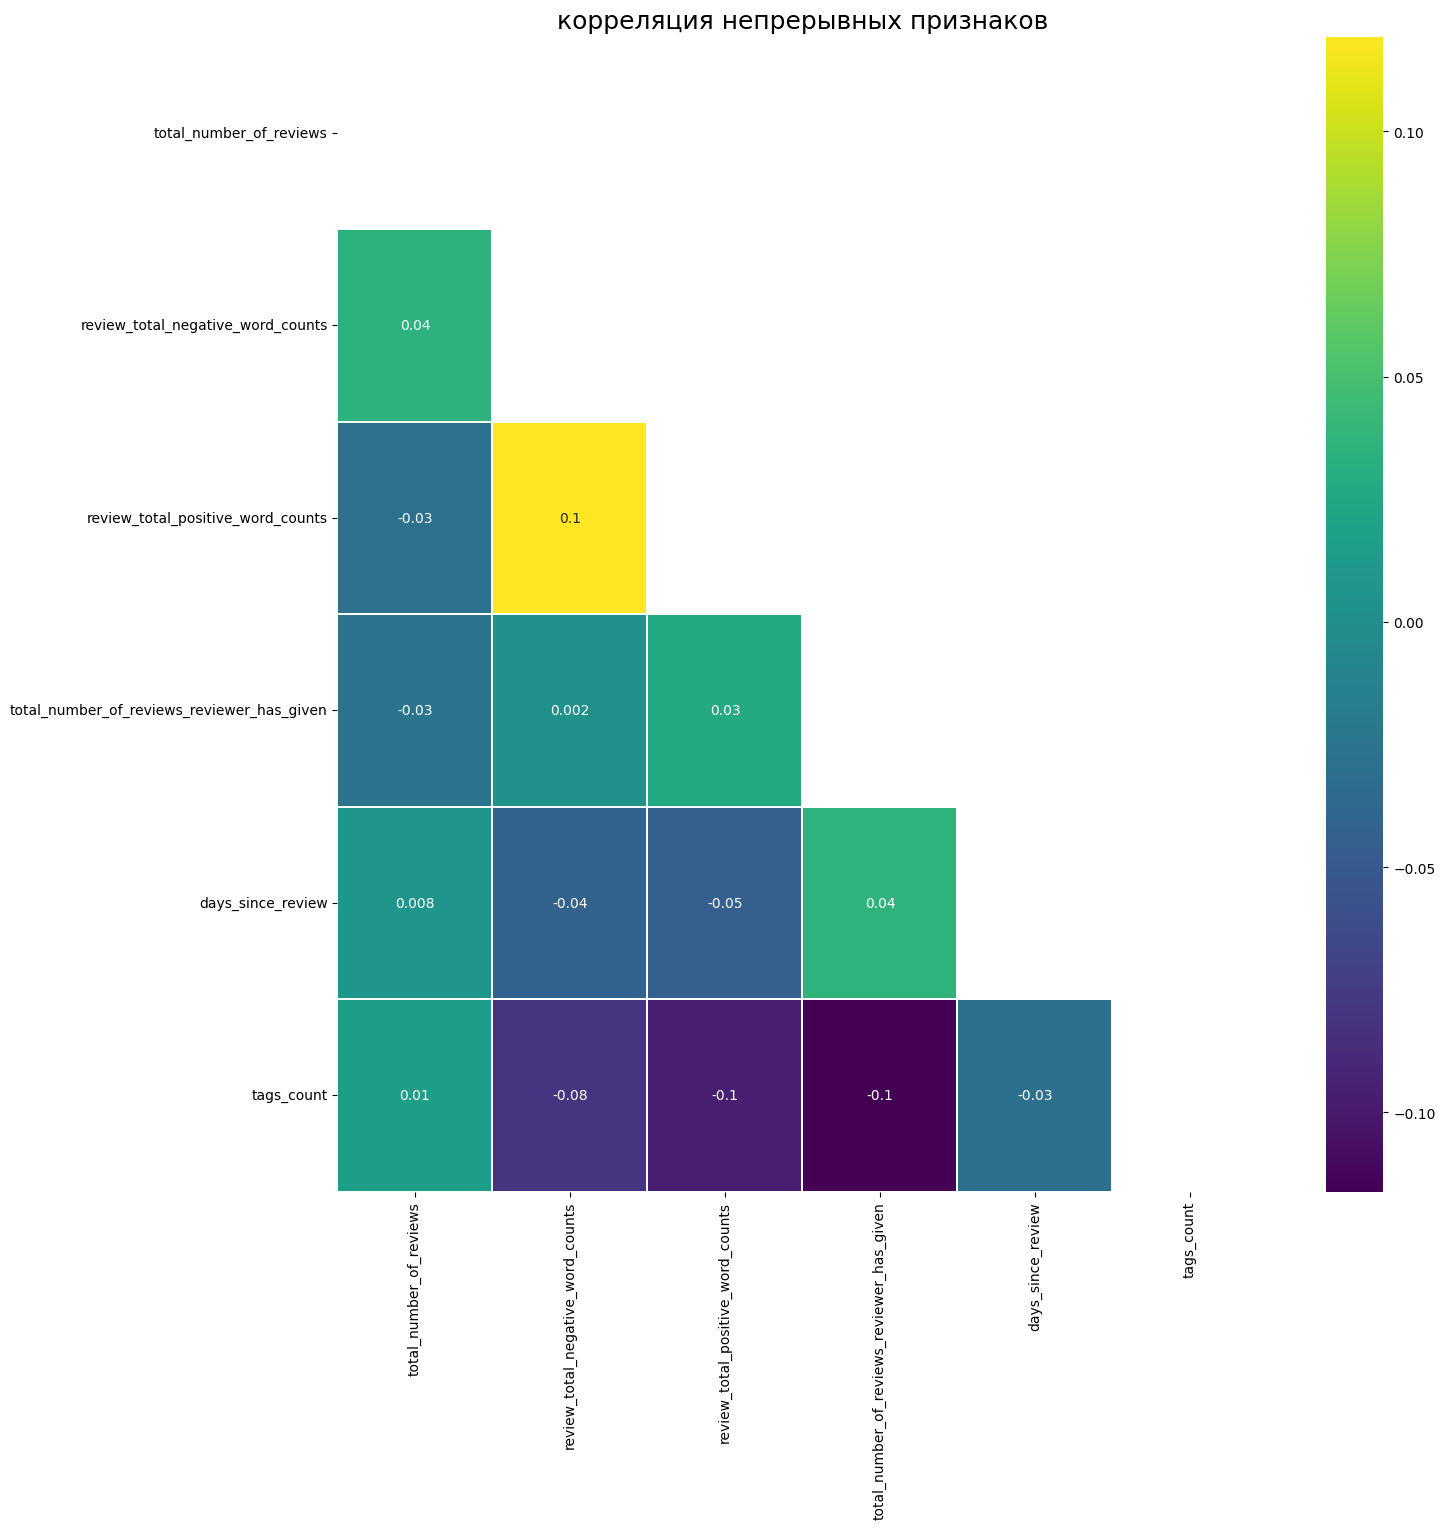

In [103]:
show_corr_heatmap(num_cols, 'корреляция непрерывных признаков', method='pearson')

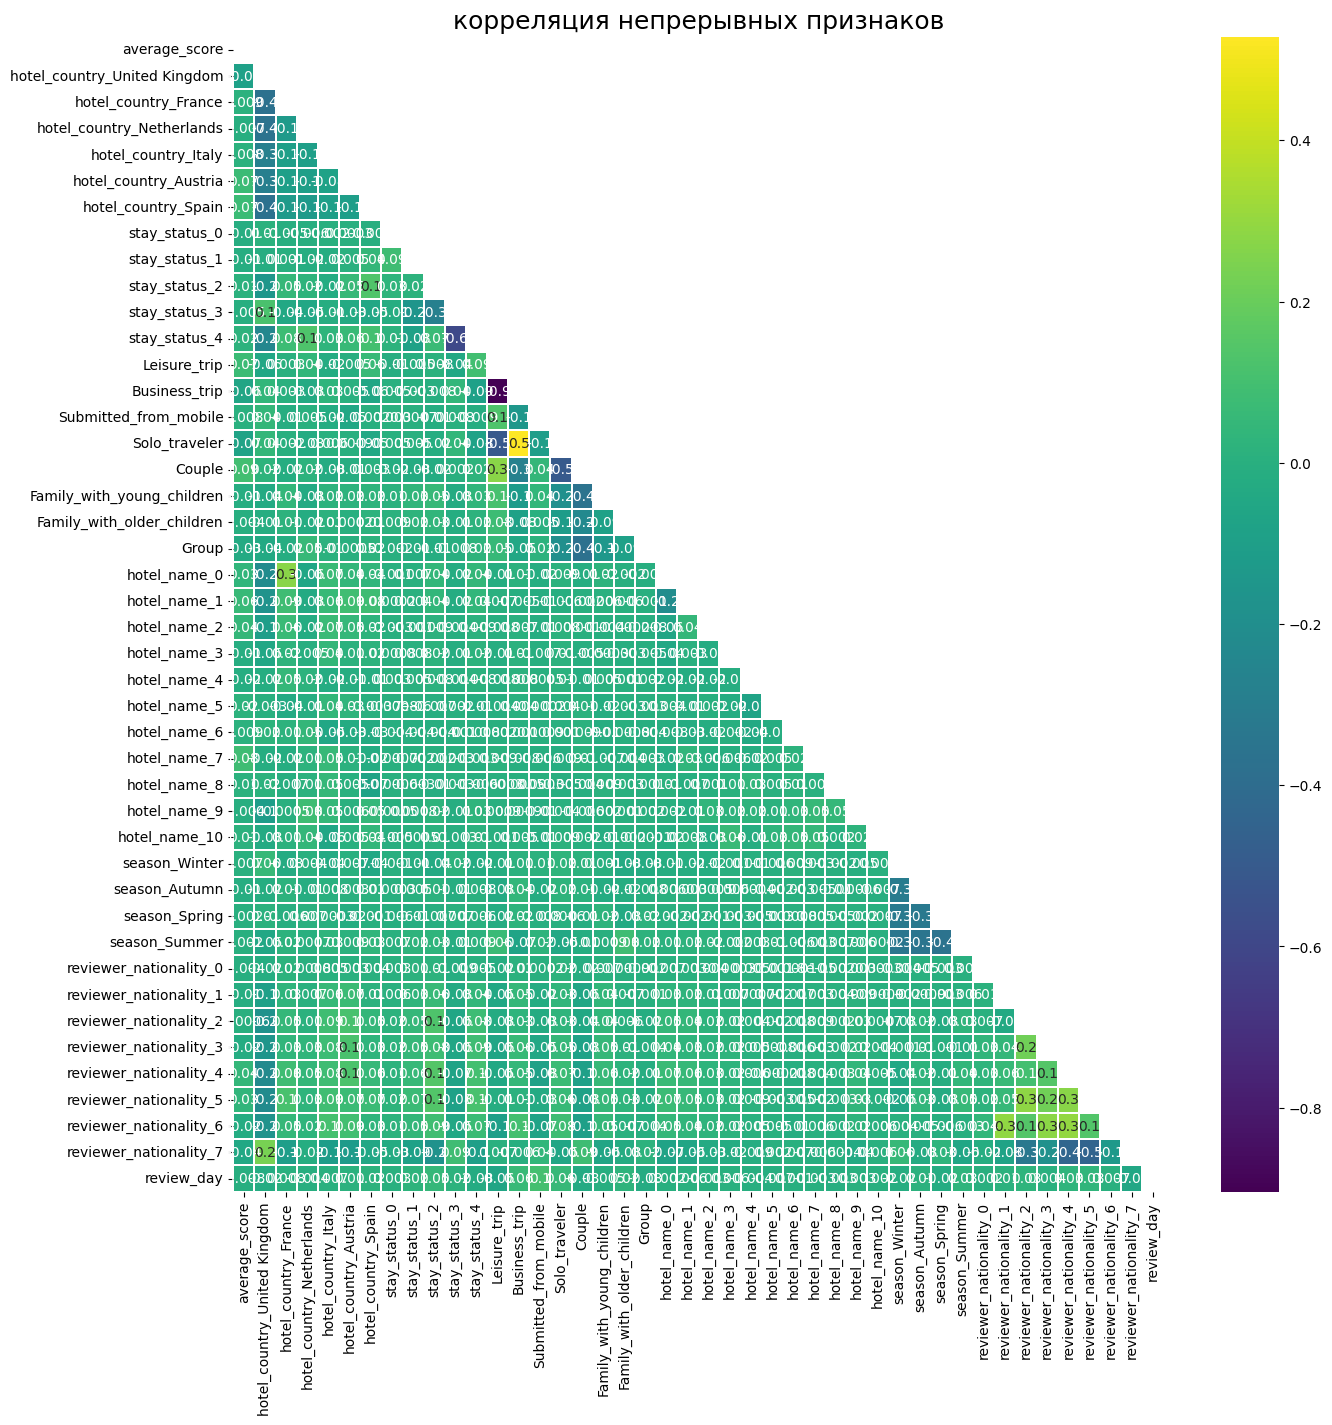

In [104]:
show_corr_heatmap(cat_cols, 'корреляция непрерывных признаков', method='spearman')

In [105]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']

<Axes: >

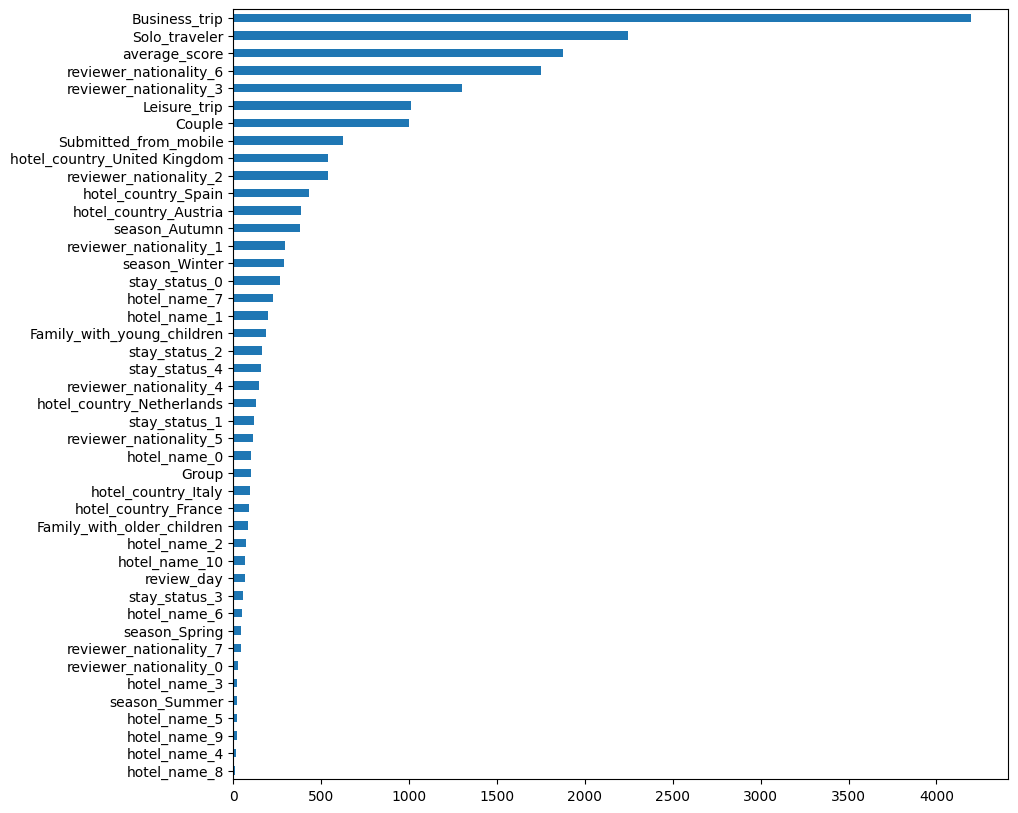

In [106]:
y=y.astype('int')

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', figsize=(10,10))

In [107]:
imp_cat

hotel_name_8                       9.263233
hotel_name_4                      15.273711
hotel_name_9                      18.217010
hotel_name_5                      18.485042
season_Summer                     19.761058
hotel_name_3                      20.056082
reviewer_nationality_0            26.940757
reviewer_nationality_7            42.184755
season_Spring                     46.363710
hotel_name_6                      48.810182
stay_status_3                     55.671093
review_day                        64.240050
hotel_name_10                     64.248433
hotel_name_2                      72.018480
Family_with_older_children        85.298643
hotel_country_France              87.561657
hotel_country_Italy               95.046373
Group                             97.835647
hotel_name_0                     102.426807
reviewer_nationality_5           110.470917
stay_status_1                    117.348124
hotel_country_Netherlands        130.218251
reviewer_nationality_4          

Ничего необычного. Признаки-мигалки и закодированные не имеют особого влияния по одиночке, но без них эффективность предсказания падает. Выносить признаки из тегов не стал.

<Axes: >

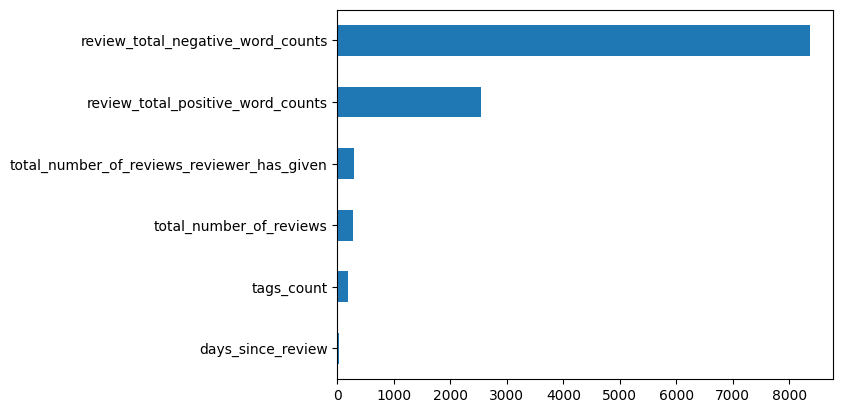

In [108]:
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [109]:
imp_num

days_since_review                               26.722059
tags_count                                     181.101179
total_number_of_reviews                        277.930171
total_number_of_reviews_reviewer_has_given     299.803806
review_total_positive_word_counts             2550.332232
review_total_negative_word_counts             8366.065720
dtype: float64

days_since_review - незначимый. Лучше удалить его.

In [110]:
hotels.drop(['days_since_review'], axis=1, inplace=True)
# hotels.drop(['Leisure_trip'], axis=1, inplace=True)


А вот тут можно попробовать удалить четыре нижних признака. Или нормализовать их. 

Также вспоминаем, что два из этих четырёх признаков имели высокие показатели коллинеарности между друг другом.

До удаления: MAPE: 13,56%

После удаления: MAPE: 13,64%

Легко заметить, что графики подставлены вручную. Это сделано из-за того, что строчка y=y.astype('int') сильно ухудшает показания. А без неё не работает код для оценки значимости категориальных признаков. Потому я её просто закомментил, а сюда вставил получающиеся графики. Можно раскомментировать, но на ваш страх и риск (и ухудшение предсказания)!

In [111]:
# col_names = list(hotels.columns)

# mm_scaler = preprocessing.RobustScaler()
# hotels_mm = mm_scaler.fit_transform(hotels)
# hotels_mm = pd.DataFrame(hotels_mm, columns=col_names)

# #Поменяем обратно нормализованный целевой признак 
# # для правильности результатов
# hotels_mm.drop(['reviewer_score'], axis = 1, inplace=True)
# hotels_mm['reviewer_score'] = hotels['reviewer_score']

In [112]:
# # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# # Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
# X = hotels_mm.drop(['reviewer_score'], axis = 1)  
# y = hotels_mm['reviewer_score']

---
## <center> Обучение модели
---

In [113]:
hotels.isna().value_counts()

average_score  review_total_negative_word_counts  total_number_of_reviews  review_total_positive_word_counts  total_number_of_reviews_reviewer_has_given  reviewer_score  review_day  tags_count  Leisure_trip  Business_trip  Submitted_from_mobile  Solo_traveler  Couple  Family_with_young_children  Family_with_older_children  Group  hotel_country_United Kingdom  hotel_country_France  hotel_country_Netherlands  hotel_country_Italy  hotel_country_Austria  hotel_country_Spain  season_Winter  season_Autumn  season_Spring  season_Summer  reviewer_nationality_0  reviewer_nationality_1  reviewer_nationality_2  reviewer_nationality_3  reviewer_nationality_4  reviewer_nationality_5  reviewer_nationality_6  reviewer_nationality_7  hotel_name_0  hotel_name_1  hotel_name_2  hotel_name_3  hotel_name_4  hotel_name_5  hotel_name_6  hotel_name_7  hotel_name_8  hotel_name_9  hotel_name_10  stay_status_0  stay_status_1  stay_status_2  stay_status_3  stay_status_4
False          False                       

In [114]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1600720456383978
